<a href="https://colab.research.google.com/github/loganhooker02/hookermachinelearning/blob/main/assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from google.colab import drive

**PROBLEM 1**

In [ ]:
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

breast_input = pd.DataFrame(X)
#breast_input.head()


(569, 30)


In [ ]:
#split between training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size =0.2, random_state = 0)
#x_train.shape

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)

classifier = LogisticRegression(random_state=0) #unweighted logistic classifier
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_val)
cnfmatrix = confusion_matrix(y_val, y_pred)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("F1 Score:", metrics.f1_score(y_val,y_pred))

Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


Text(0.5, 427.9555555555555, 'Predicted Label')

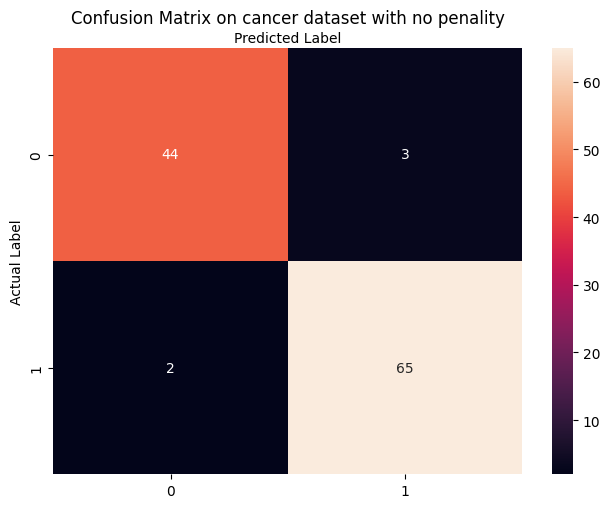

In [ ]:
#create confusion matrix
class_names=[0, 1]
figure, axis = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#heatmap creation
sea.heatmap(pd.DataFrame(cnfmatrix), annot = True, fmt = 'g')
axis.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix on cancer dataset with no penality')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

**PROBLEM 1 II**

In [ ]:
pen = 1.0 #penalty value
classifierpen = LogisticRegression(penalty = 'l1', C=pen, solver = 'saga')
classifierpen.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [ ]:
y_predb = classifierpen.predict(x_val)
cnfmatrix_b = confusion_matrix(y_val, y_predb)
print("Accuracy:", metrics.accuracy_score(y_val, y_predb))
print("Precision:", metrics.precision_score(y_val, y_predb))
print("Recall:", metrics.recall_score(y_val, y_predb))
print("F1 Score:", metrics.f1_score(y_val, y_predb))


Accuracy: 0.9736842105263158
Precision: 0.9571428571428572
Recall: 1.0
F1 Score: 0.9781021897810218


Text(0.5, 427.9555555555555, 'Predicted Label')

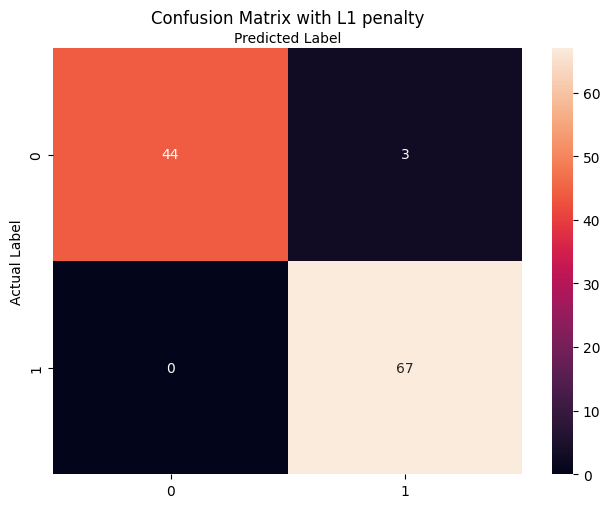

In [ ]:
#create confusion matrix
class_names=[0, 1]
figure, axis = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#heatmap creation
sea.heatmap(pd.DataFrame(cnfmatrix_b), annot = True, fmt = 'g')
axis.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix with L1 penalty')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

**Problem 2**


In [ ]:
bayesian = GaussianNB()
bayesian.fit(x_train, y_train)
y_pred2 = bayesian.predict(x_val)

cnfmatrix2 = confusion_matrix(y_val, y_pred2)
print("Accuracy:", metrics.accuracy_score(y_val, y_pred2))
print("Precision:", metrics.precision_score(y_val, y_pred2))
print("Recall:", metrics.recall_score(y_val, y_pred2))
print("F1 Score:", metrics.f1_score(y_val, y_pred2))

Accuracy: 0.9385964912280702
Precision: 0.9411764705882353
Recall: 0.9552238805970149
F1 Score: 0.9481481481481482


Text(0.5, 427.9555555555555, 'Predicted Label')

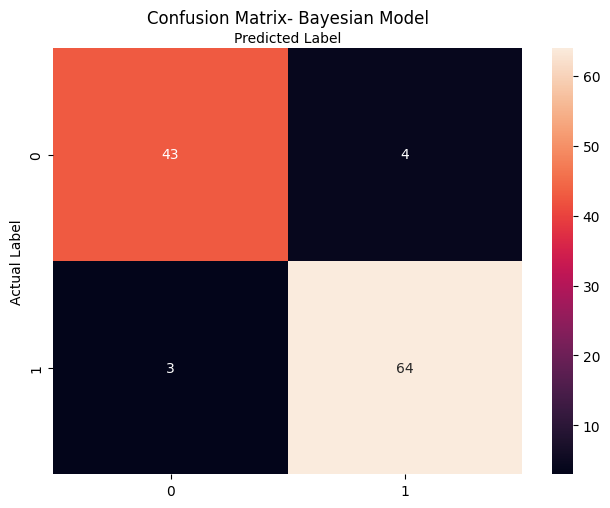

In [ ]:
#create confusion matrix
class_names=[0, 1]
figure, axis = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#heatmap creation
sea.heatmap(pd.DataFrame(cnfmatrix2), annot = True, fmt = 'g')
axis.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix- Bayesian Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

**Problem 3**

In [ ]:
def featureReduction(xtrain, xval, K):
  pca = PCA(n_components = K)
  xtrainfin = pca.fit_transform(xtrain)
  xvalfin   = pca.fit_transform(xval)
  return xtrainfin, xvalfin

K value for highest accuracy:  7
Accuracy: 0.9649122807017544
[0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]


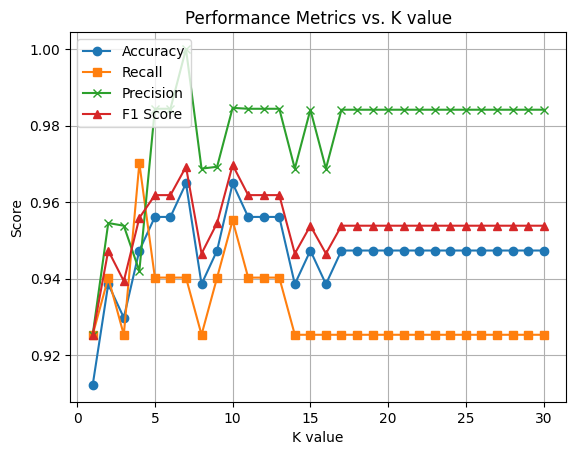

In [ ]:
#determine the optimal K reduction
highestacc = 0.0
accuracies = []
precisions = []
recalls    = []
f1scores   = []
for K in range(1, 31):
  xtrain3, xval3 = featureReduction(x_train,x_val,K)
  clf3 = LogisticRegression(random_state=0)
  clf3.fit(xtrain3, y_train)
  y_pred3 = clf3.predict(xval3)

  accuracies.append(metrics.accuracy_score(y_val,y_pred3))
  precisions.append(metrics.precision_score(y_val,y_pred3))
  recalls.append(metrics.recall_score(y_val,y_pred3))
  f1scores.append(metrics.f1_score(y_val,y_pred3))
  if(metrics.accuracy_score(y_val,y_pred3) > highestacc):
    highestacc = metrics.accuracy_score(y_val,y_pred3)
    high_K = K
print("K value for highest accuracy: ", high_K)
print("Accuracy:", highestacc)
print(accuracies)

plt.plot(range(1, 31), accuracies, label='Accuracy', marker='o')
plt.plot(range(1, 31), recalls, label='Recall', marker='s')
plt.plot(range(1, 31), precisions, label='Precision', marker='x')
plt.plot(range(1, 31), f1scores, label='F1 Score', marker='^')

plt.title('Performance Metrics vs. K value')
plt.xlabel('K value')
plt.ylabel('Score')
plt.xticks()
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#redo at optimal

classifier3 = LogisticRegression(random_state=0)
xtrain3, xval3 = featureReduction(x_train,x_val,high_K)
classifier3.fit(xtrain3,y_train)
ypred3 = classifier3.predict(xval3)

cnfmatrix3 = confusion_matrix(y_val, ypred3)
print("Accuracy:",metrics.accuracy_score(y_val, ypred3))
print("Precision:",metrics.precision_score(y_val, ypred3))
print("Recall:",metrics.recall_score(y_val, ypred3))
print("F1 Score:", metrics.f1_score(y_val,ypred3))

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9402985074626866
F1 Score: 0.9692307692307692


Text(0.5, 427.9555555555555, 'Predicted label')

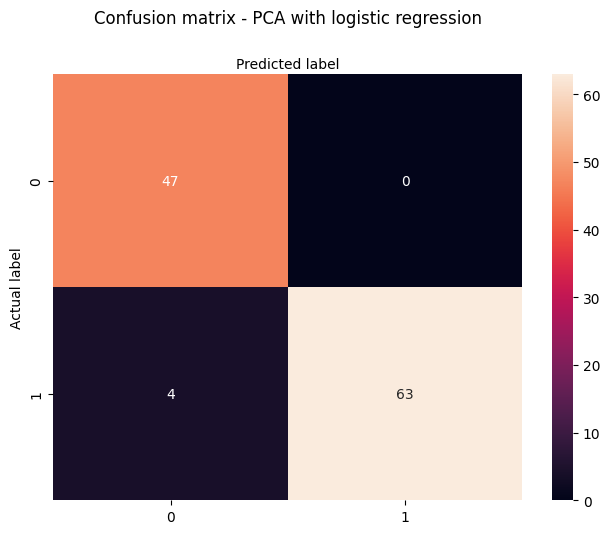

In [ ]:
#confusion matrix

class_names=['M','B']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix3), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - PCA with logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Problem 4, repeat 3 with bayesian**

K value for highest accuracy:  4
Accuracy: 0.9298245614035088
[0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.8859649122807017, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.8596491228070176, 0.8508771929824561, 0.8596491228070176, 0.8596491228070176, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8596491228070176, 0.8421052631578947]


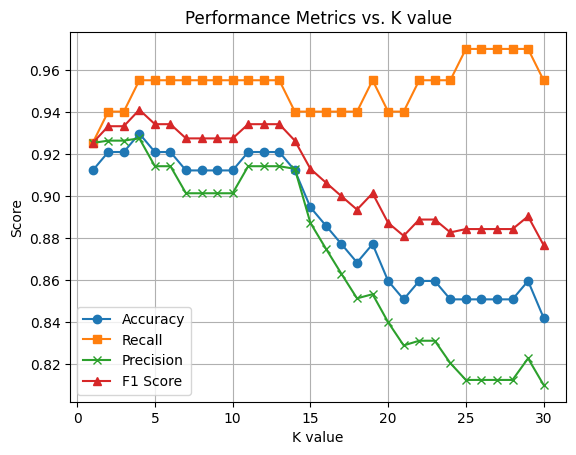

In [ ]:
#determine the optimal K reduction
highestacc4 = 0.0
accuracies4 = []
precisions4 = []
recalls4    = []
f1scores4   = []
for K in range(1, 31):
  xtrain4, xval4 = featureReduction(x_train,x_val,K)
  bayesian4 = GaussianNB()
  bayesian4.fit(xtrain4, y_train)
  y_pred4 = bayesian4.predict(xval4)

  accuracies4.append(metrics.accuracy_score(y_val,y_pred4))
  precisions4.append(metrics.precision_score(y_val,y_pred4))
  recalls4.append(metrics.recall_score(y_val,y_pred4))
  f1scores4.append(metrics.f1_score(y_val,y_pred4))
  if(metrics.accuracy_score(y_val,y_pred4) > highestacc4):
    highestacc4 = metrics.accuracy_score(y_val,y_pred4)
    high_K4 = K
print("K value for highest accuracy: ", high_K4)
print("Accuracy:", highestacc4)
print(accuracies4)

plt.plot(range(1, 31), accuracies4, label='Accuracy', marker='o')
plt.plot(range(1, 31), recalls4, label='Recall', marker='s')
plt.plot(range(1, 31), precisions4, label='Precision', marker='x')
plt.plot(range(1, 31), f1scores4, label='F1 Score', marker='^')

plt.title('Performance Metrics vs. K value')
plt.xlabel('K value')
plt.ylabel('Score')
plt.xticks()
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9298245614035088
Precision: 0.927536231884058
Recall: 0.9552238805970149
F1 Score: 0.9411764705882353


Text(0.5, 427.9555555555555, 'Predicted label')

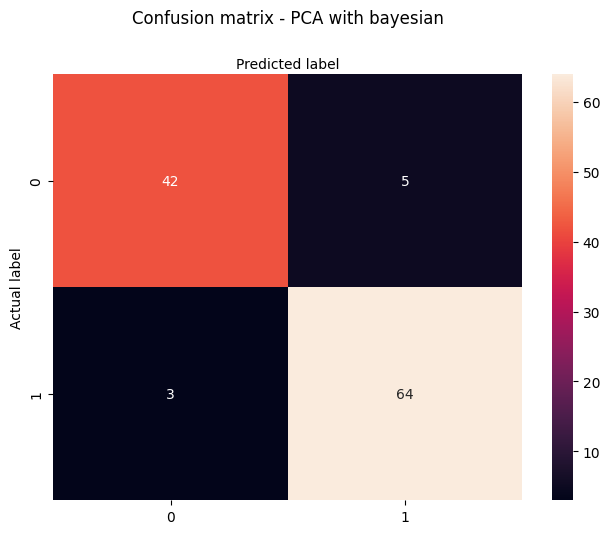

In [ ]:
#redo at optimal

naive4 = GaussianNB()
xtrain4, xval4 = featureReduction(x_train,x_val,high_K4)
naive4.fit(xtrain4,y_train)
ypred4 = naive4.predict(xval4)

cnfmatrix4 = confusion_matrix(y_val, ypred4)
print("Accuracy:",metrics.accuracy_score(y_val, ypred4))
print("Precision:",metrics.precision_score(y_val, ypred4))
print("Recall:",metrics.recall_score(y_val, ypred4))
print("F1 Score:", metrics.f1_score(y_val,ypred4))


#confusion matrix

class_names=['M','B']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix4), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - PCA with bayesian', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')